In [4]:
import sys
import importlib as imp
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')
#imp.reload(HelperPI)
import HelperPI
import itertools
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.special import inv_boxcox
from scipy.stats.distributions import uniform, lognorm
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as sts
import numpy as np
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from scipy import interp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, HuberRegressor, ElasticNet, Ridge
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import lightgbm as lgbm
import tensorflow as tf

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


In [5]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [6]:
sql = helper.getSQL(path=r'C:\Users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\Contest_Sql.sql')
base, dtypedf = helper.readData(sql)

INFO:root:Reading data...
INFO:root:Data read complete...
INFO:root:Read: 80000 rows.


                           Count Column Type
0                      LAST_NAME      object
1                 ADDRESS_LINE_1      object
2                 ADDRESS_LINE_2      object
3                      CITY_NAME      object
4                     STATE_CODE      object
5                   COUNTRY_CODE      object
6                            ZIP      object
7                        ZIP_EXT      object
8                      SALES_R12     float64
9                      SALES_R24     float64
10                     SALES_R48     float64
11                     SALES_RLT     float64
12       FISHING_MARINE_SALES_LT     float64
13  CAMPING_WATERSPORTS_SALES_LT     float64
14    HUNTING_HUNTCLOTH_SALES_LT     float64
15             FOOTWEAR_SALES_LT     float64
16             SHOOTING_SALES_LT     float64
17                 GIFT_SALES_LT     float64
18              APPAREL_SALES_LT     float64
19                OTHER_SALES_LT     float64
20                     VISITS_LT     float64
21        

In [7]:
mean = np.mean(base['SALES_TARGET_N12'])
std = np.std(base['SALES_TARGET_N12'])
mean, std

base = base[base['SALES_TARGET_N12'] < mean+std*10]

#base['SALES_TARGET_N12_CBRT'], lmda = stats.boxcox(base['SALES_TARGET_N12'])
base.describe()

,SALES_R12,SALES_R24,SALES_R48,SALES_RLT,FISHING_MARINE_SALES_LT,CAMPING_WATERSPORTS_SALES_LT,HUNTING_HUNTCLOTH_SALES_LT,FOOTWEAR_SALES_LT,SHOOTING_SALES_LT,GIFT_SALES_LT,APPAREL_SALES_LT,OTHER_SALES_LT,VISITS_LT,FISH_MARINE_PERC,CAMPING_WATERSPORTS_PERC,HUNTING_PERC,FOOTWEAR_PERC,SHOOTING_PERC,GIFT_PERC,APPAREL_PERC,OTHER_PERC,DAYS_SINCE_PURCHASE,DAYS_AS_CUSTOMER,REWARDS_CUSTOMER,YOY_TREND,SALES_TARGET_N12
count,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79867.000000,79867.000000,79867.000000,79867.000000,79867.000000,79867.000000,79867.000000,79867.000000,79867.000000,79867.000000,79886.000000,79886.000000,79886.000000
mean,82.792064,167.983857,339.163032,673.742892,186.434994,61.770801,137.455222,48.638592,97.440698,31.447705,99.426281,11.128599,6.908632,0.209205,0.104324,0.152432,0.082415,0.110229,0.114998,0.206606,0.019790,951.794621,1993.146857,0.388103,0.046828,55.083669
std,256.107998,484.623457,842.554856,1826.393811,901.209978,207.923251,538.890977,145.242442,435.147834,104.617323,298.725027,60.128022,18.064832,0.328262,0.230661,0.271785,0.203035,0.251376,0.251354,0.310046,0.101232,424.658836,1214.127811,0.487321,4.614572,197.899435
min,0.000000,0.000000,0.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,365.000000,365.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,35.920000,48.622500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,577.000000,1026.000000,0.000000,-0.936329,0.000000
50%,0.000000,31.055000,95.980000,147.265000,0.000000,0.000000,0.000000,0.000000,0.000000,1.690000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005394,0.026786,0.000000,874.000000,1593.000000,0.000000,0.000000,0.000000
75%,57.970000,139.530000,282.555000,518.072500,75.980000,32.950000,58.177500,29.950000,21.990000,20.830000,79.977500,0.000000,6.000000,0.324014,0.078758,0.192007,0.048013,0.049707,0.081060,0.301717,0.000000,1294.000000,3015.000000,1.000000,0.000000,0.000000
max,12852.800000,52563.430000,58373.910000,129722.800000,128329.100000,20524.390000,30163.340000,4778.870000,43336.380000,4157.470000,19823.710000,2829.240000,1012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4002.000000,4329.000000,1.000000,824.386243,2851.730000


In [8]:
# plt.hist(base['SALES_TARGET_N12_CBRT'], bins=20)
# plt.show()
# print(lmda)

In [9]:
base['SALES_TARGET_N12'].describe()

count    79886.000000
mean        55.083669
std        197.899435
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2851.730000
Name: SALES_TARGET_N12, dtype: float64

In [10]:
collist = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND','SALES_TARGET_N12']
collist_X = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND']
#collist_y = ['SALES_TARGET_N12_CBRT']
collist_y = ['SALES_TARGET_N12']

In [11]:
train, test = helper.splitData(base[collist], .8)

train, val = helper.splitData(train, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].as_matrix().ravel()
val_X = val[collist_X]
val_y = val[collist_y].as_matrix().ravel()
test_X = test[collist_X]
test_y = test[collist_y].as_matrix().ravel()


interactions = helper.find_iteractions(train_X, train_y)
interactions.to_csv('interactions.csv')

(31954, 26) (31954, 26) (15978, 26)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


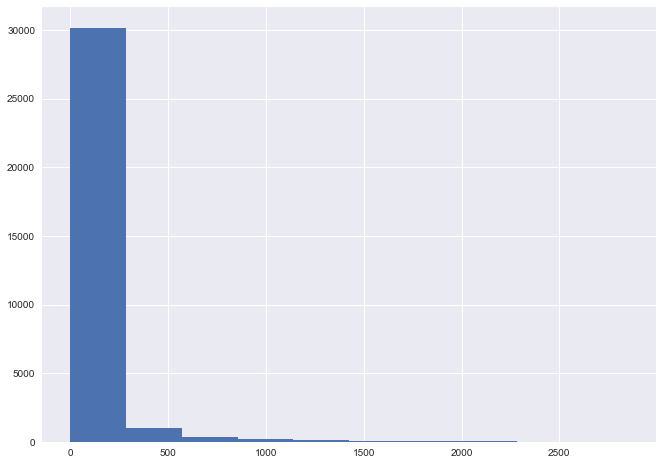

In [12]:
plt.hist(train_y, bins = 10)
plt.show()

In [13]:
collist_X = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND', 'SALES_R12*REWARDS_CUSTOMER']

train_X['SALES_R12*REWARDS_CUSTOMER'] = train_X['SALES_R12']*train_X['REWARDS_CUSTOMER']
val_X['SALES_R12*REWARDS_CUSTOMER'] = val_X['SALES_R12']*val_X['REWARDS_CUSTOMER']
test_X['SALES_R12*REWARDS_CUSTOMER'] = test_X['SALES_R12']*test_X['REWARDS_CUSTOMER']

imr = Imputer(missing_values='NaN',strategy='median',axis=0)
imr = imr.fit(train_X)

train_X = pd.DataFrame(imr.transform(train_X.values), columns = collist_X)
val_X = pd.DataFrame(imr.transform(val_X.values), columns = collist_X)
test_X = pd.DataFrame(imr.transform(test_X.values), columns = collist_X)

stdsc = StandardScaler()
stdsc.fit(train_X)

train_X = pd.DataFrame(stdsc.transform(train_X.values), columns = collist_X)
val_X = pd.DataFrame(stdsc.transform(val_X.values), columns = collist_X)
test_X = pd.DataFrame(stdsc.transform(test_X.values), columns = collist_X)

for var in collist_X:
    name = var + '_cbrt'
    train_X[name] = np.cbrt(train_X[var])
    val_X[name] = np.cbrt(val_X[var])
    test_X[name] = np.cbrt(test_X[var])
    name = var + '_sq'
    train_X[name] = np.power(train_X[var], 2)
    val_X[name] = np.power(val_X[var], 2)
    test_X[name] = np.power(test_X[var], 2)
   
    
collist_X_expanded = train_X.columns.values


In [14]:
collist_X_expanded = collist_X_expanded.tolist()

In [15]:
missing_df = train_X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]



,column_name,missing_count,missing_ratio


Anderson-Darling: 8201.074519303162 Critical Value: 0.787 
train_y is not normally distributed


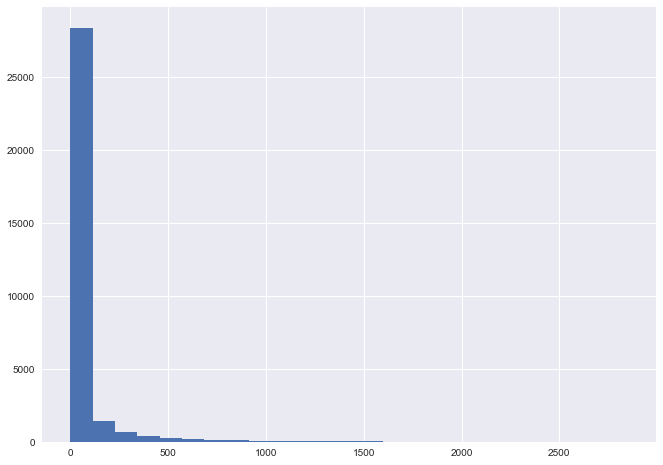

In [16]:
stat, cv, sig = stats.anderson(train_y, 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))
if stat > cv[2]:
    print('train_y is not normally distributed')
else:
    print('train_y is normally distributed')
plt.hist(train_y, bins=25)
plt.show()

In [17]:
matplotlib.rcParams['figure.figsize'] = (5,2)

#collist_X_expanded.remove('VISITS_LT_sqrt')
#collist_X_expanded.remove('YOY_TREND_log')


train_X = train_X[collist_X_expanded]

collist_X_expanded = sorted(collist_X_expanded, key=str.lower)



for var in collist_X_expanded: 
    vardf = train_X[var]
    #print(vardf.head())
    coef, pval = stats.pearsonr(vardf.as_matrix(), train_y)
    print('%50s Corr Coef: %7s - pval:  %.4f' % (var, str(round(coef,2)), pval))
    #plt.hist(train_X[var], bins = 100)
    #plt.show()
    
matplotlib.rcParams['figure.figsize'] = (11,8)

                                      APPAREL_PERC Corr Coef:   -0.04 - pval:  0.0000
                                 APPAREL_PERC_cbrt Corr Coef:   -0.03 - pval:  0.0000
                                   APPAREL_PERC_sq Corr Coef:   -0.09 - pval:  0.0000
                                  APPAREL_SALES_LT Corr Coef:    0.31 - pval:  0.0000
                             APPAREL_SALES_LT_cbrt Corr Coef:    0.32 - pval:  0.0000
                               APPAREL_SALES_LT_sq Corr Coef:    0.08 - pval:  0.0000
                          CAMPING_WATERSPORTS_PERC Corr Coef:   -0.01 - pval:  0.0109
                     CAMPING_WATERSPORTS_PERC_cbrt Corr Coef:    0.03 - pval:  0.0000
                       CAMPING_WATERSPORTS_PERC_sq Corr Coef:   -0.05 - pval:  0.0000
                      CAMPING_WATERSPORTS_SALES_LT Corr Coef:    0.28 - pval:  0.0000
                 CAMPING_WATERSPORTS_SALES_LT_cbrt Corr Coef:    0.31 - pval:  0.0000
                   CAMPING_WATERSPORTS_SALES_LT_sq Cor

In [18]:
collist_X_expanded = ['APPAREL_SALES_LT','CAMPING_WATERSPORTS_PERC_sq','CAMPING_WATERSPORTS_SALES_LT','DAYS_AS_CUSTOMER',
                      'DAYS_SINCE_PURCHASE','FISH_MARINE_PERC_cbrt','FISHING_MARINE_SALES_LT','FOOTWEAR_PERC_cbrt',
                      'FOOTWEAR_SALES_LT','GIFT_PERC','GIFT_SALES_LT','HUNTING_HUNTCLOTH_SALES_LT','HUNTING_PERC_cbrt',
                      'OTHER_PERC_cbrt','OTHER_SALES_LT_cbrt','REWARDS_CUSTOMER','SALES_R12','SALES_R12*REWARDS_CUSTOMER',
                      'SALES_R24','SALES_R48','SALES_RLT','SHOOTING_PERC_cbrt','SHOOTING_SALES_LT','VISITS_LT_cbrt',
                      'YOY_TREND_cbrt']
train_X = train_X[collist_X_expanded]

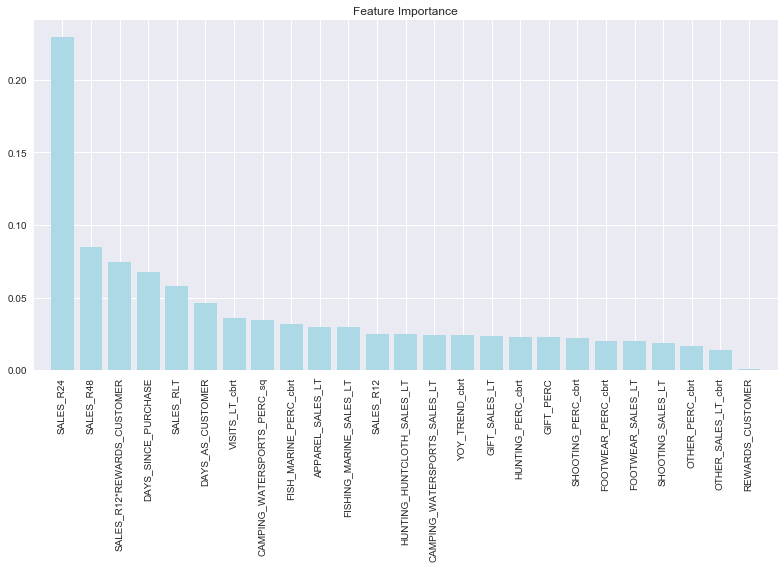

In [19]:
feat_labels = np.asarray(collist_X_expanded)

forests = RandomForestRegressor(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(train_X2.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
#                                       importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [20]:
slct = SelectKBest(f_regression, k=15)
slct.fit(train_X, train_y)
selected = slct.get_support()

feat_labels2 = feat_labels[selected]
feat_labels2

array(['APPAREL_SALES_LT', 'CAMPING_WATERSPORTS_SALES_LT',
       'FISHING_MARINE_SALES_LT', 'FOOTWEAR_SALES_LT', 'GIFT_SALES_LT',
       'HUNTING_HUNTCLOTH_SALES_LT', 'OTHER_SALES_LT_cbrt',
       'REWARDS_CUSTOMER', 'SALES_R12', 'SALES_R12*REWARDS_CUSTOMER',
       'SALES_R24', 'SALES_R48', 'SALES_RLT', 'SHOOTING_SALES_LT',
       'VISITS_LT_cbrt'],
      dtype='<U28')

### Calculate Feature Correlations and VIF scores

    VIF Factor                       feature
9     2.737289                     SALES_R24
11    2.532373                VISITS_LT_cbrt
3     2.172197             FOOTWEAR_SALES_LT
8     2.136891    SALES_R12*REWARDS_CUSTOMER
5     2.029339    HUNTING_HUNTCLOTH_SALES_LT
2     1.953993       FISHING_MARINE_SALES_LT
1     1.863048  CAMPING_WATERSPORTS_SALES_LT
0     1.812108              APPAREL_SALES_LT
6     1.611570           OTHER_SALES_LT_cbrt
4     1.587089                 GIFT_SALES_LT
10    1.456091             SHOOTING_SALES_LT
7     1.379583              REWARDS_CUSTOMER


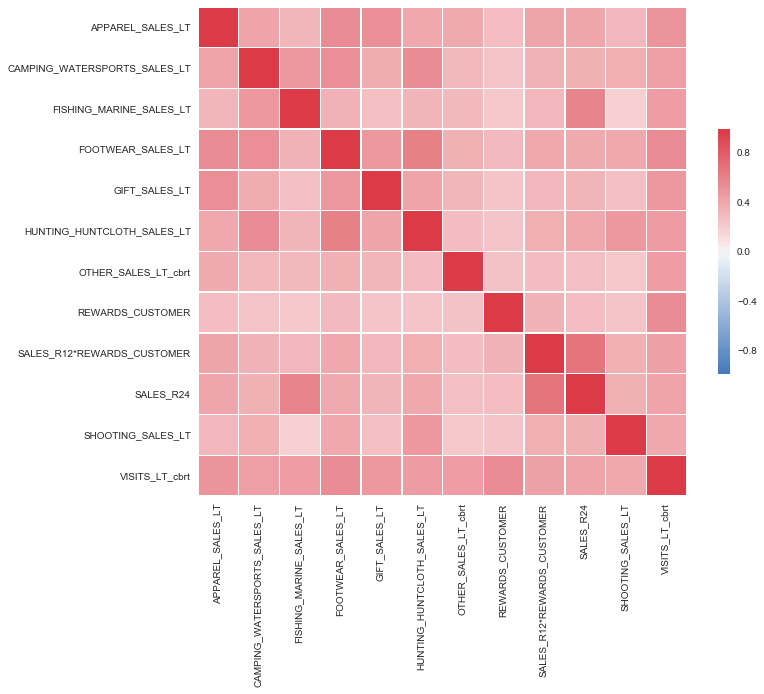

In [102]:
collist_X2 = ['APPAREL_SALES_LT', 'CAMPING_WATERSPORTS_SALES_LT',
       'FISHING_MARINE_SALES_LT', 'FOOTWEAR_SALES_LT', 'GIFT_SALES_LT',
       'HUNTING_HUNTCLOTH_SALES_LT', 'OTHER_SALES_LT_cbrt',
       'REWARDS_CUSTOMER', 'SALES_R12*REWARDS_CUSTOMER',
       'SALES_R24', 'SHOOTING_SALES_LT',
       'VISITS_LT_cbrt']

#collist_X2 = feat_labels2.tolist()

train_X2 = train_X[collist_X2]
    
corr = train_X2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


print(helper.calc_VIFs(train_X2))

In [22]:
param_test1 = {
     'learning_rate':uniform(0.01,0.09),
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.5,0.4),
     'subsample': uniform(0.5,0.4),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:linear'],
     'gamma':lognorm(0.1, 1.0)
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=200,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1)    

Parameter search took 832.47 seconds for 200 candidate parameter settings.
Best Mean validation score: -26116.171 (std: 699.254)
Parameters: {'colsample_bytree': 0.74290101336902692, 'gamma': 1.8759549864242049, 'learning_rate': 0.041979921052183171, 'max_depth': 5, 'min_child_weight': 9, 'objective': 'reg:linear', 'reg_alpha': 0.74610391841710699, 'reg_lambda': 0.39772365636506002, 'subsample': 0.50957248212590511}


In [141]:

tuned_model = xgb.XGBRegressor( 
                        learning_rate = 0.036,
                        n_estimators = 87,
                        max_depth = 5,
                        min_child_weight = 6,
                        subsample = 0.61,
                        colsample_bytree = 0.52,
                        objective = 'reg:linear',
                        reg_alpha= 0.1033,
                        reg_lambda = 0.7064,
                        gamma = 2.06,
                        seed = 27)
xgbmodel = tuned_model.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

# fig, ax = plt.subplots(figsize=(12,18))
# xgb.plot_importance(xgbmodel, height=0.8, ax=ax)
# plt.show()

[0]	validation_0-rmse:199.349	validation_1-rmse:202.097	validation_2-rmse:210.781
Multiple eval metrics have been passed: 'validation_2-rmse' will be used for early stopping.

Will train until validation_2-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:197.38	validation_1-rmse:200.301	validation_2-rmse:208.844
[2]	validation_0-rmse:194.956	validation_1-rmse:198.029	validation_2-rmse:206.536
[3]	validation_0-rmse:192.714	validation_1-rmse:195.906	validation_2-rmse:204.332
[4]	validation_0-rmse:190.512	validation_1-rmse:193.896	validation_2-rmse:202.154
[5]	validation_0-rmse:188.539	validation_1-rmse:192.013	validation_2-rmse:200.264
[6]	validation_0-rmse:186.56	validation_1-rmse:190.219	validation_2-rmse:198.35
[7]	validation_0-rmse:184.715	validation_1-rmse:188.507	validation_2-rmse:196.568
[8]	validation_0-rmse:182.9	validation_1-rmse:186.832	validation_2-rmse:194.782
[9]	validation_0-rmse:181.189	validation_1-rmse:185.26	validation_2-rmse:193.171
[10]	validation_0-rmse:179

In [143]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.418562979429
RMSE Train: 148.47875275601123
RMSE Val: 161.5981715794903
RMSE Test: 167.84897641253747
MAE Train: 57.1865782597
MAE Val: 60.9687252597
MAE Test: 62.2871808245


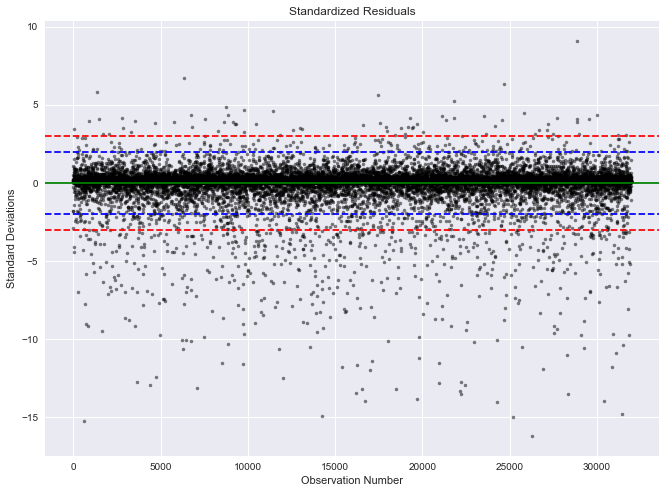

In [25]:
plotdata = pd.DataFrame({'true':y_true.tolist(),'pred':y_pred.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [26]:
param_test1 = {
     'boosting_type':['dart'],
     'num_leaves':list(range(10,40)),
     'max_depth':[-1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
     'objective':[None, 'regression','regression_l1'],
     'min_split_gain':uniform(0.0, 1.0),
     'min_child_weight':uniform(0.0, 1.0),
     'subsample':uniform(0.1, 0.9),
     'colsample_bytree':uniform(0.1, 0.9),
     'reg_alpha': uniform(0.0, 10.0),
     'reg_lambda': uniform(0.0, 10.0),
     'learning_rate':uniform(0.01,0.09),
     'silent':[True]
}


gsearch1 = RandomizedSearchCV(estimator = lgbm.LGBMRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=200,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1)   

Parameter search took 118.13 seconds for 200 candidate parameter settings.
Best Mean validation score: -28054.153 (std: 2289.335)
Parameters: {'boosting_type': 'dart', 'colsample_bytree': 0.98424521701654488, 'learning_rate': 0.095818231291890835, 'max_depth': 7, 'min_child_weight': 0.8651877236426011, 'min_split_gain': 0.54300457073468145, 'num_leaves': 35, 'objective': 'regression', 'reg_alpha': 5.5878382530776456, 'reg_lambda': 0.18939450163261373, 'silent': True, 'subsample': 0.96556918032885775}


In [27]:
lgbmmodel = lgbm.LGBMRegressor( 
                        boosting_type='dart',
                        colsample_bytree=0.687,
                        learning_rate=0.1,
                        max_depth=5, 
                        min_child_weight=0.68497,
                        min_split_gain=0.2355,
                        num_leaves=13,
                        objective='regression_l1',
                        reg_alpha=7.796,
                        reg_lambda=1.96,
                        subsample=0.705,
                        n_estimators=93)
lgbmmodel.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

[1]	valid_0's rmse: 189.172	valid_1's rmse: 192.012	valid_2's rmse: 200.347
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 184.142	valid_1's rmse: 187.212	valid_2's rmse: 195.387
[3]	valid_0's rmse: 179.851	valid_1's rmse: 183.18	valid_2's rmse: 191.094
[4]	valid_0's rmse: 176.606	valid_1's rmse: 180.195	valid_2's rmse: 187.928
[5]	valid_0's rmse: 173.428	valid_1's rmse: 177.421	valid_2's rmse: 184.995
[6]	valid_0's rmse: 173.798	valid_1's rmse: 177.834	valid_2's rmse: 185.433
[7]	valid_0's rmse: 170.905	valid_1's rmse: 175.221	valid_2's rmse: 182.606
[8]	valid_0's rmse: 168.587	valid_1's rmse: 172.97	valid_2's rmse: 180.169
[9]	valid_0's rmse: 166.716	valid_1's rmse: 171.286	valid_2's rmse: 178.386
[10]	valid_0's rmse: 164.973	valid_1's rmse: 169.709	valid_2's rmse: 176.823
[11]	valid_0's rmse: 163.527	valid_1's rmse: 168.525	valid_2's rmse: 175.414
[12]	valid_0's rmse: 162.22	valid_1's rmse: 167.424	valid_2's rmse: 174.211
[13]	valid_0's rmse: 161.

LGBMRegressor(boosting_type='dart', colsample_bytree=0.687, learning_rate=0.1,
       max_bin=255, max_depth=5, min_child_samples=10,
       min_child_weight=0.68497, min_split_gain=0.2355, n_estimators=93,
       n_jobs=-1, num_leaves=13, objective='regression_l1', random_state=0,
       reg_alpha=7.796, reg_lambda=1.96, silent=True, subsample=0.705,
       subsample_for_bin=50000, subsample_freq=1)

In [28]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, lgbmmodel.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, lgbmmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, lgbmmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))


The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.388271434428
RMSE Train: 152.29735159400227
RMSE Val: 162.20604342892833
RMSE Test: 168.58393411147037


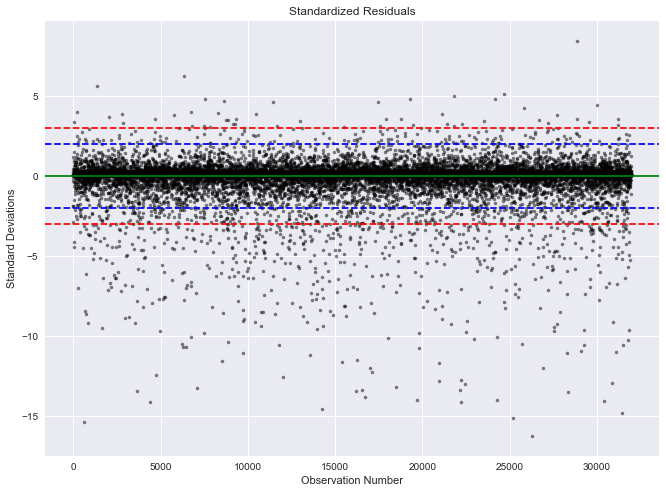

In [29]:
plotdata = pd.DataFrame({'true':y_true.tolist(),'pred':y_pred.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [123]:
## TENSORFLOW

feature_columns = [tf.feature_column.numeric_column('x', shape=train_X2.shape[1:])]
regressor = tf.estimator.DNNRegressor(
    feature_columns = feature_columns, hidden_units=[100,50,25])

train_input_fn = tf.estimator.inputs.numpy_input_fn(x={'x': train_X2.values}, y=train_y, batch_size=1000, num_epochs=100,shuffle=True)
regressor.train(input_fn= train_input_fn, steps=5000)


#VALIDATION SET
# x_transformed = scaler.transform(x_test)
test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': val_X[collist_X2].values}, y=val_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
y_predicted = y_predicted.reshape(val_y.shape)

# Score with sklearn.
score_sklearn = mean_squared_error(y_predicted, val_y)
print('MSE (sklearn): {0:f}'.format(score_sklearn))

# Score with tensorflow.
scores = regressor.evaluate(input_fn=test_input_fn)
print('MSE (tensorflow): {0:f}'.format(scores['average_loss']))


rmse1 = math.sqrt(mean_squared_error(val_y, y_predicted))


#TESTING SET
test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': test_X[collist_X2].values}, y=test_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
y_predicted = y_predicted.reshape(test_y.shape)

# Score with sklearn.
score_sklearn = mean_squared_error(y_predicted, test_y)


# Score with tensorflow.
scores = regressor.evaluate(input_fn=test_input_fn)

print('MSE (tensorflow): {0:f}'.format(scores['average_loss']))
print('MSE (sklearn): {0:f}'.format(score_sklearn))

rmse2 = math.sqrt(mean_squared_error(test_y, y_predicted))
print('RMSE Val: ' + str(rmse1))
print('RMSE test: ' + str(rmse2))


INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Temp\\tmp2gmcx8t7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000025250CF8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Temp\\tmp2gmcx8t7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000025250CF8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into C:\Temp\tmp2gmcx8t7\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into C:\Temp\tmp2gmcx8t7\model.ckpt.


INFO:tensorflow:loss = 3.9789e+07, step = 1


INFO:tensorflow:loss = 3.9789e+07, step = 1


INFO:tensorflow:global_step/sec: 163.132


INFO:tensorflow:global_step/sec: 163.132


INFO:tensorflow:loss = 2.4958e+07, step = 101 (0.615 sec)


INFO:tensorflow:loss = 2.4958e+07, step = 101 (0.615 sec)


INFO:tensorflow:global_step/sec: 177.305


INFO:tensorflow:global_step/sec: 177.305


INFO:tensorflow:loss = 2.80928e+07, step = 201 (0.564 sec)


INFO:tensorflow:loss = 2.80928e+07, step = 201 (0.564 sec)


INFO:tensorflow:global_step/sec: 202.02


INFO:tensorflow:global_step/sec: 202.02


INFO:tensorflow:loss = 3.26997e+07, step = 301 (0.495 sec)


INFO:tensorflow:loss = 3.26997e+07, step = 301 (0.495 sec)


INFO:tensorflow:global_step/sec: 202.02


INFO:tensorflow:global_step/sec: 202.02


INFO:tensorflow:loss = 3.52228e+07, step = 401 (0.494 sec)


INFO:tensorflow:loss = 3.52228e+07, step = 401 (0.494 sec)


INFO:tensorflow:global_step/sec: 202.429


INFO:tensorflow:global_step/sec: 202.429


INFO:tensorflow:loss = 1.84553e+07, step = 501 (0.495 sec)


INFO:tensorflow:loss = 1.84553e+07, step = 501 (0.495 sec)


INFO:tensorflow:global_step/sec: 196.464


INFO:tensorflow:global_step/sec: 196.464


INFO:tensorflow:loss = 1.68781e+07, step = 601 (0.509 sec)


INFO:tensorflow:loss = 1.68781e+07, step = 601 (0.509 sec)


INFO:tensorflow:global_step/sec: 196.078


INFO:tensorflow:global_step/sec: 196.078


INFO:tensorflow:loss = 2.50081e+07, step = 701 (0.510 sec)


INFO:tensorflow:loss = 2.50081e+07, step = 701 (0.510 sec)


INFO:tensorflow:global_step/sec: 191.571


INFO:tensorflow:global_step/sec: 191.571


INFO:tensorflow:loss = 3.46971e+07, step = 801 (0.522 sec)


INFO:tensorflow:loss = 3.46971e+07, step = 801 (0.522 sec)


INFO:tensorflow:global_step/sec: 176.367


INFO:tensorflow:global_step/sec: 176.367


INFO:tensorflow:loss = 2.50646e+07, step = 901 (0.567 sec)


INFO:tensorflow:loss = 2.50646e+07, step = 901 (0.567 sec)


INFO:tensorflow:global_step/sec: 204.082


INFO:tensorflow:global_step/sec: 204.082


INFO:tensorflow:loss = 3.08989e+07, step = 1001 (0.490 sec)


INFO:tensorflow:loss = 3.08989e+07, step = 1001 (0.490 sec)


INFO:tensorflow:global_step/sec: 199.601


INFO:tensorflow:global_step/sec: 199.601


INFO:tensorflow:loss = 2.1769e+07, step = 1101 (0.502 sec)


INFO:tensorflow:loss = 2.1769e+07, step = 1101 (0.502 sec)


INFO:tensorflow:global_step/sec: 199.601


INFO:tensorflow:global_step/sec: 199.601


INFO:tensorflow:loss = 1.75065e+07, step = 1201 (0.500 sec)


INFO:tensorflow:loss = 1.75065e+07, step = 1201 (0.500 sec)


INFO:tensorflow:global_step/sec: 204.499


INFO:tensorflow:global_step/sec: 204.499


INFO:tensorflow:loss = 2.63472e+07, step = 1301 (0.489 sec)


INFO:tensorflow:loss = 2.63472e+07, step = 1301 (0.489 sec)


INFO:tensorflow:global_step/sec: 202.84


INFO:tensorflow:global_step/sec: 202.84


INFO:tensorflow:loss = 2.02552e+07, step = 1401 (0.493 sec)


INFO:tensorflow:loss = 2.02552e+07, step = 1401 (0.493 sec)


INFO:tensorflow:global_step/sec: 198.02


INFO:tensorflow:global_step/sec: 198.02


INFO:tensorflow:loss = 2.58864e+07, step = 1501 (0.505 sec)


INFO:tensorflow:loss = 2.58864e+07, step = 1501 (0.505 sec)


INFO:tensorflow:global_step/sec: 181.488


INFO:tensorflow:global_step/sec: 181.488


INFO:tensorflow:loss = 3.09341e+07, step = 1601 (0.553 sec)


INFO:tensorflow:loss = 3.09341e+07, step = 1601 (0.553 sec)


INFO:tensorflow:global_step/sec: 197.239


INFO:tensorflow:global_step/sec: 197.239


INFO:tensorflow:loss = 2.29705e+07, step = 1701 (0.505 sec)


INFO:tensorflow:loss = 2.29705e+07, step = 1701 (0.505 sec)


INFO:tensorflow:global_step/sec: 179.856


INFO:tensorflow:global_step/sec: 179.856


INFO:tensorflow:loss = 2.38509e+07, step = 1801 (0.555 sec)


INFO:tensorflow:loss = 2.38509e+07, step = 1801 (0.555 sec)


INFO:tensorflow:global_step/sec: 190.114


INFO:tensorflow:global_step/sec: 190.114


INFO:tensorflow:loss = 2.62253e+07, step = 1901 (0.527 sec)


INFO:tensorflow:loss = 2.62253e+07, step = 1901 (0.527 sec)


INFO:tensorflow:global_step/sec: 178.891


INFO:tensorflow:global_step/sec: 178.891


INFO:tensorflow:loss = 2.05037e+07, step = 2001 (0.562 sec)


INFO:tensorflow:loss = 2.05037e+07, step = 2001 (0.562 sec)


INFO:tensorflow:global_step/sec: 169.205


INFO:tensorflow:global_step/sec: 169.205


INFO:tensorflow:loss = 3.63911e+07, step = 2101 (0.589 sec)


INFO:tensorflow:loss = 3.63911e+07, step = 2101 (0.589 sec)


INFO:tensorflow:global_step/sec: 185.529


INFO:tensorflow:global_step/sec: 185.529


INFO:tensorflow:loss = 1.92821e+07, step = 2201 (0.539 sec)


INFO:tensorflow:loss = 1.92821e+07, step = 2201 (0.539 sec)


INFO:tensorflow:global_step/sec: 188.324


INFO:tensorflow:global_step/sec: 188.324


INFO:tensorflow:loss = 3.23129e+07, step = 2301 (0.530 sec)


INFO:tensorflow:loss = 3.23129e+07, step = 2301 (0.530 sec)


INFO:tensorflow:global_step/sec: 186.567


INFO:tensorflow:global_step/sec: 186.567


INFO:tensorflow:loss = 1.91864e+07, step = 2401 (0.538 sec)


INFO:tensorflow:loss = 1.91864e+07, step = 2401 (0.538 sec)


INFO:tensorflow:global_step/sec: 189.394


INFO:tensorflow:global_step/sec: 189.394


INFO:tensorflow:loss = 2.0284e+07, step = 2501 (0.527 sec)


INFO:tensorflow:loss = 2.0284e+07, step = 2501 (0.527 sec)


INFO:tensorflow:global_step/sec: 197.239


INFO:tensorflow:global_step/sec: 197.239


INFO:tensorflow:loss = 2.37281e+07, step = 2601 (0.506 sec)


INFO:tensorflow:loss = 2.37281e+07, step = 2601 (0.506 sec)


INFO:tensorflow:global_step/sec: 199.203


INFO:tensorflow:global_step/sec: 199.203


INFO:tensorflow:loss = 3.37071e+07, step = 2701 (0.502 sec)


INFO:tensorflow:loss = 3.37071e+07, step = 2701 (0.502 sec)


INFO:tensorflow:global_step/sec: 197.628


INFO:tensorflow:global_step/sec: 197.628


INFO:tensorflow:loss = 2.30494e+07, step = 2801 (0.506 sec)


INFO:tensorflow:loss = 2.30494e+07, step = 2801 (0.506 sec)


INFO:tensorflow:global_step/sec: 197.239


INFO:tensorflow:global_step/sec: 197.239


INFO:tensorflow:loss = 1.5911e+07, step = 2901 (0.507 sec)


INFO:tensorflow:loss = 1.5911e+07, step = 2901 (0.507 sec)


INFO:tensorflow:global_step/sec: 199.203


INFO:tensorflow:global_step/sec: 199.203


INFO:tensorflow:loss = 2.61908e+07, step = 3001 (0.502 sec)


INFO:tensorflow:loss = 2.61908e+07, step = 3001 (0.502 sec)


INFO:tensorflow:global_step/sec: 194.175


INFO:tensorflow:global_step/sec: 194.175


INFO:tensorflow:loss = 2.16343e+07, step = 3101 (0.515 sec)


INFO:tensorflow:loss = 2.16343e+07, step = 3101 (0.515 sec)


INFO:tensorflow:Saving checkpoints for 3196 into C:\Temp\tmp2gmcx8t7\model.ckpt.


INFO:tensorflow:Saving checkpoints for 3196 into C:\Temp\tmp2gmcx8t7\model.ckpt.


INFO:tensorflow:Loss for final step: 1.01842e+07.


INFO:tensorflow:Loss for final step: 1.01842e+07.


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


MSE (sklearn): 25869.575543
INFO:tensorflow:Starting evaluation at 2017-11-10-15:53:37


INFO:tensorflow:Starting evaluation at 2017-11-10-15:53:37


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Finished evaluation at 2017-11-10-15:53:38


INFO:tensorflow:Finished evaluation at 2017-11-10-15:53:38


INFO:tensorflow:Saving dict for global step 3196: average_loss = 25869.6, global_step = 3196, loss = 3.30655e+06


INFO:tensorflow:Saving dict for global step 3196: average_loss = 25869.6, global_step = 3196, loss = 3.30655e+06


MSE (tensorflow): 25869.580078
INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Starting evaluation at 2017-11-10-15:53:39


INFO:tensorflow:Starting evaluation at 2017-11-10-15:53:39


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Finished evaluation at 2017-11-10-15:53:40


INFO:tensorflow:Finished evaluation at 2017-11-10-15:53:40


INFO:tensorflow:Saving dict for global step 3196: average_loss = 28054.3, global_step = 3196, loss = 3.58601e+06


INFO:tensorflow:Saving dict for global step 3196: average_loss = 28054.3, global_step = 3196, loss = 3.58601e+06


MSE (tensorflow): 28054.279297
MSE (sklearn): 28054.283790
RMSE Val: 160.84021743045753
RMSE test: 167.49413061271466


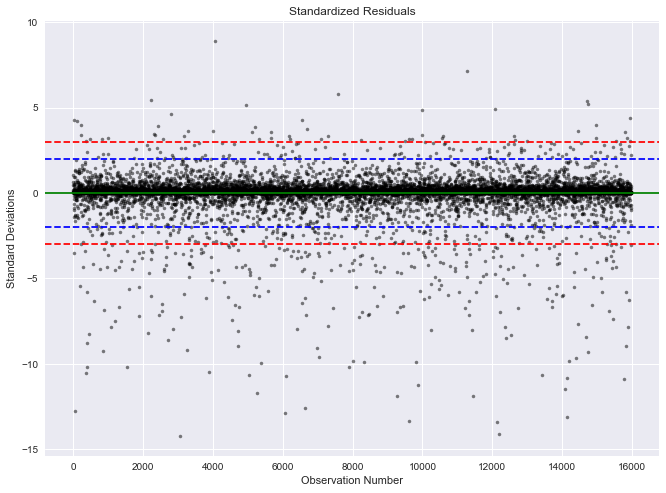

Anderson-Darling: 2875.2142911617193 Critical Value: 0.787 


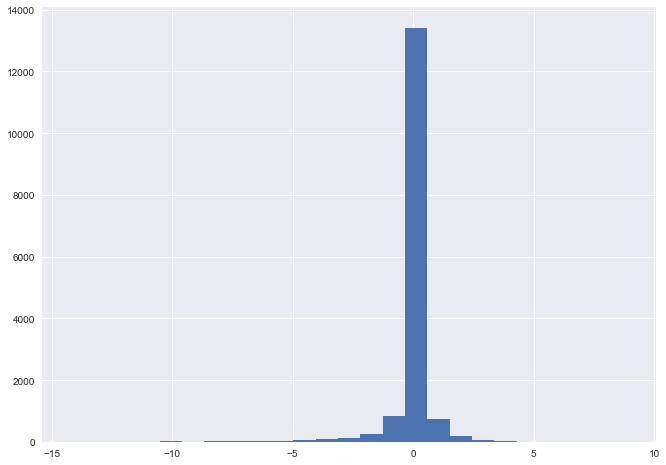

In [124]:
tfmodel = regressor
testing = pd.DataFrame({'true':test_y, 'pred':y_predicted})

testing['resid'] = testing['pred']-testing['true']
testing['stdresid'] = testing['resid']/np.std(testing['resid'])

plt.plot(testing['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

stat, cv, sig = stats.anderson(testing['stdresid'], 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))

plt.hist(testing['stdresid'], bins=25)
plt.show()

In [30]:
param_test1 = {
     'alpha': uniform(0.1, 10.0)
}


clf = RandomizedSearchCV(estimator = Ridge(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=500)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    




Parameter search took 15.44 seconds for 500 candidate parameter settings.
Best Mean validation score: -27431.735 (std: 0.097)
Parameters: {'alpha': 10.085408971192098}


In [31]:
ridgemodel = Ridge(alpha = 10.03)
ridgemodel.fit(train_X2.values, train_y)

Ridge(alpha=10.03, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, ridgemodel.predict(train_X2.values)
y_true, y_pred = val_y, ridgemodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, ridgemodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))


The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.298850767
RMSE Train: 163.04902355015324
RMSE Val: 164.3952372596564
RMSE Test: 168.4677026585735


In [33]:
param_test1 = {
     'alpha': uniform(0.1, 10.0),
     'l1_ratio':uniform(0.1, 0.9),
     'selection':['random']
}


clf = RandomizedSearchCV(estimator = ElasticNet(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=3,
                              n_iter=300)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    


Parameter search took 25.03 seconds for 300 candidate parameter settings.
Best Mean validation score: -27325.074 (std: 1301.445)
Parameters: {'alpha': 4.1852021793234426, 'l1_ratio': 0.99919469931488036, 'selection': 'random'}


In [34]:
elasticmodel = ElasticNet(alpha = .2153, l1_ratio=0.5474, selection = 'random')
elasticmodel.fit(train_X2.values, train_y)

ElasticNet(alpha=0.2153, copy_X=True, fit_intercept=True, l1_ratio=0.5474,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)

In [35]:
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, elasticmodel.predict(train_X2.values)
y_true, y_pred = val_y, elasticmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, elasticmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))



The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.297035433428
RMSE Train: 163.25996083377154
RMSE Val: 164.37924580604556
RMSE Test: 168.91416438402015


In [ ]:
param_test1 = {
     'alpha':uniform(0.0,1.0),
     'activation':['identity','logistic','tanh','relu'],
     'beta_1':uniform(0.0, 1.0),
     'beta_2':uniform(0.0, 1.0),
     'early_stopping':[True],
     'shuffle':[True],
     'hidden_layer_sizes':[(2,)],
     'learning_rate_init':[0.01]
}


clf = RandomizedSearchCV(estimator = MLPRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_absolute_error',
                              n_jobs=3,
                              n_iter=100)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    


In [ ]:
pms = clf.best_params_


mlpmodel = MLPRegressor(activation=pms['activation'],
                        alpha=pms['alpha'],
                        beta_1=pms['beta_1'],
                        beta_2=pms['beta_2'],
                        early_stopping=pms['early_stopping'],
                        hidden_layer_sizes=pms['hidden_layer_sizes'],
                        learning_rate_init=pms['learning_rate_init']
                        shuffle=pms['shuffle'])
mlpmodel.fit(train_X2.values, train_y)

In [185]:
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, mlpmodel.predict(train_X2.values)
y_true, y_pred = val_y, mlpmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, mlpmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))



The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.283641948117
RMSE Train: 164.80790699304592
RMSE Val: 162.5028946844798
RMSE Test: 169.4771913005799


In [175]:
error = 1000
neurons = 2

while True:
    
    mlpmodel = MLPRegressor(activation='relu',
                            alpha=0.698,
                            beta_1=0.42,
                            beta_2=0.053,
                            early_stopping=True,
                            hidden_layer_sizes=(neurons,),
                            shuffle=True)
    mlpmodel.fit(train_X2.values, train_y)

    y_true, y_pred = val_y, mlpmodel.predict(val_X[collist_X2].values)

    #print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    
    
    if rmse <= error:
        print('{} Neurons, Val RMSE: {}'.format(neurons, rmse))
        error = rmse
        neurons += 1        
    else:
        break



2 Neurons, Val RMSE: 163.47827935500254


In [39]:
param_test1 = {
     'C':uniform(0.0,1.0),
     'epsilon': uniform(0.0, 1.0),
     'loss':['squared_epsilon_insensitive', 'epsilon_insensitive']
}


clf = RandomizedSearchCV(estimator = LinearSVR(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_absolute_error',
                              n_jobs=3,
                              n_iter=200)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    


Parameter search took 347.46 seconds for 200 candidate parameter settings.
Best Mean validation score: -50.034 (std: 6.114)
Parameters: {'C': 0.9527881010420205, 'epsilon': 0.045925683721835364, 'loss': 'epsilon_insensitive'}


In [40]:
lsvrmodel = LinearSVR(C=0.96, epsilon=0.7472, loss='epsilon_insensitive')
lsvrmodel.fit(train_X2.values, train_y)

LinearSVR(C=0.96, dual=True, epsilon=0.7472, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [41]:
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, lsvrmodel.predict(train_X2.values)
y_true, y_pred = val_y, lsvrmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, lsvrmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))


The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.200307625138
RMSE Train: 174.13034005755406
RMSE Val: 176.09578625746647
RMSE Test: 182.3240677822858


In [152]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': val_X[collist_X2].values}, y=val_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
tfpred = y_predicted.reshape(val_y.shape)


test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': test_X[collist_X2].values}, y=test_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
tf_test = y_predicted.reshape(test_y.shape)


xgbpred = xgbmodel.predict(val_X[collist_X2].values)
elasticpred = elasticmodel.predict(val_X[collist_X2].values)
lassopred = ridgemodel.predict(val_X[collist_X2].values)
mlppred = mlpmodel.predict(val_X[collist_X2].values)
lsvrpred = lsvrmodel.predict(val_X[collist_X2].values)
lgbmpred = lgbmmodel.predict(val_X[collist_X2].values)

resarray = np.array([val_y, xgbpred, elasticpred, lassopred, mlppred, lsvrpred, lgbmpred, tfpred], np.float64)

xgb_test = xgbmodel.predict(test_X[collist_X2].values)
elastic_test = elasticmodel.predict(test_X[collist_X2].values)
lasso_test = ridgemodel.predict(test_X[collist_X2].values)
mlp_test = mlpmodel.predict(test_X[collist_X2].values)
lsvr_test = lsvrmodel.predict(test_X[collist_X2].values)
lgbm_test = lgbmmodel.predict(test_X[collist_X2].values)

res_test = np.array([test_y, xgb_test, elastic_test, lasso_test, mlp_test, lsvr_test, lgbm_test, tf_test], np.float64)

result = pd.DataFrame(resarray.transpose(), columns = ['true_y','xgbpred', 'elasticpred','ridgepred', 'mlppred','lsvrpred','lgbmpred','tfpred'])
result_test = pd.DataFrame(res_test.transpose(), columns = ['true_y','xgbpred', 'elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred'])


ensX = result[['xgbpred', 'elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred']].values
ensy = result[['true_y']].values

finX = result_test[['xgbpred', 'elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred']].values
finy = result_test[['true_y']].values

INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


INFO:tensorflow:Restoring parameters from C:\Temp\tmp2gmcx8t7\model.ckpt-3196


In [153]:
result_test['avg'] = (result_test['xgbpred']+result_test['elasticpred']+result_test['ridgepred']+result_test['mlppred']+result_test['lsvrpred']+result_test['lgbmpred']+result_test['tfpred'])/7
result_test['std'] = result_test[['xgbpred','elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred']].std(axis=1)
result_test.head()

,true_y,xgbpred,elasticpred,ridgepred,mlppred,lsvrpred,lgbmpred,tfpred,avg,std
0,0.0,72.126007,92.323787,95.968177,68.798386,24.577455,57.816794,74.373161,69.426252,23.829673
1,0.0,77.467735,96.660648,105.440062,80.801274,35.923632,65.877568,106.030464,81.171626,24.973231
2,0.0,16.231205,14.646304,14.231882,11.728143,-0.279410,13.896364,12.065067,11.788508,5.538238
3,0.0,7.171676,7.595241,6.832293,10.798494,-0.848760,9.207025,4.938936,6.527844,3.741700
4,0.0,13.771541,13.931547,11.639598,13.256083,0.531018,12.810646,13.843403,11.397691,4.858502


In [163]:
result_test2 = result_test.sort_values(by='true_y').reset_index()

print('R2 Train: ' + str(r2_score(result_test2['true_y'],result_test2['avg'])))
rmse = math.sqrt(mean_squared_error(result_test2['true_y'],result_test2['avg']))
print('RMSE Train: ' + str(rmse))

R2 Train: 0.332818515664
RMSE Train: 167.98170415301703


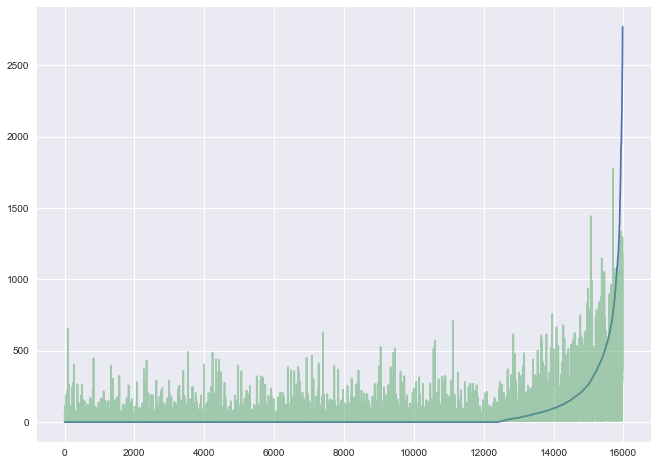

In [155]:
plt.plot(result_test2['true_y'])
plt.plot(result_test2['avg'], alpha=0.5)
plt.show()

xgbpred


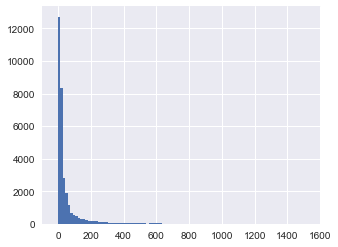

elasticpred


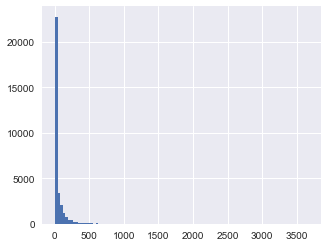

ridgepred


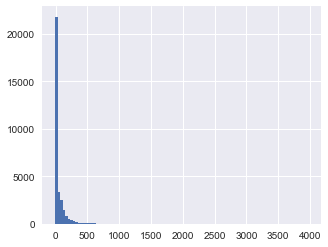

mlppred


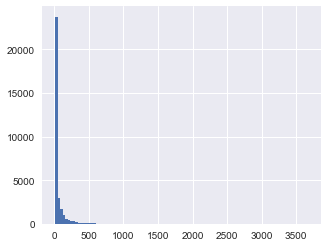

lsvrpred


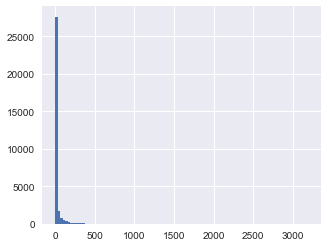

lgbmpred


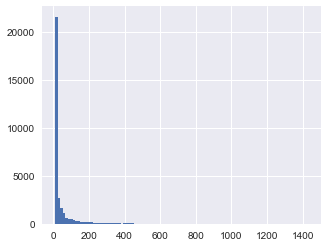

tfpred


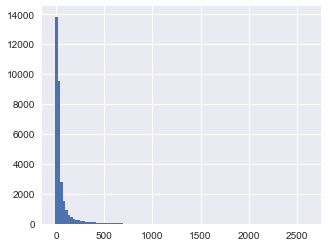

In [156]:
matplotlib.rcParams['figure.figsize'] = (5,4)
lst = ['xgbpred', 'elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred']

for var in range(len(lst)):
    print(lst[var])
    plt.hist(ensX[:, var], bins = 100)
    plt.show()
    
    
    
matplotlib.rcParams['figure.figsize'] = (11,8)

In [157]:
param_test1 = {
     'learning_rate':[0.01],
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.5,0.4),
     'subsample': uniform(0.5,0.4),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:linear'],
     'gamma': uniform(0.1,0.9)
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1,
                              n_iter=100,
                              cv=5)
start = time()
gsearch1.fit(ensX, ensy)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1)    

Parameter search took 395.95 seconds for 100 candidate parameter settings.
Best Mean validation score: -55.307 (std: 0.156)
Parameters: {'colsample_bytree': 0.51045611428264337, 'gamma': 0.51958046887112252, 'learning_rate': 0.01, 'max_depth': 17, 'min_child_weight': 5, 'objective': 'reg:linear', 'reg_alpha': 0.64609187441617066, 'reg_lambda': 0.96444921202420986, 'subsample': 0.55086464467215412}


In [159]:
#max_depth = 10
#min_child_weight = 1
#colsample_bytree = 0.7
#subsample = 1.0

metaxgb = xgb.XGBRegressor( 
                        learning_rate = 0.01,
                        n_estimators = 258,
                        max_depth = 17,
                        min_child_weight = 5,
                        subsample = 0.55,
                        colsample_bytree = 0.51,
                        objective = 'reg:linear',
                        reg_alpha= 0.646,
                        reg_lambda = 0.964,
                        gamma = 0.52,
                        seed = 27)
metaxgb.fit(ensX, ensy, 
                 eval_set=[(finX, finy)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

print(metaxgb.best_iteration, metaxgb.best_score)

[0]	validation_0-rmse:212.542
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:211.855
[2]	validation_0-rmse:211.122
[3]	validation_0-rmse:210.396
[4]	validation_0-rmse:209.681
[5]	validation_0-rmse:209.002
[6]	validation_0-rmse:208.298
[7]	validation_0-rmse:207.574
[8]	validation_0-rmse:206.936
[9]	validation_0-rmse:206.305
[10]	validation_0-rmse:205.687
[11]	validation_0-rmse:205.079
[12]	validation_0-rmse:204.474
[13]	validation_0-rmse:203.884
[14]	validation_0-rmse:203.295
[15]	validation_0-rmse:202.703
[16]	validation_0-rmse:202.073
[17]	validation_0-rmse:201.536
[18]	validation_0-rmse:200.945
[19]	validation_0-rmse:200.339
[20]	validation_0-rmse:199.803
[21]	validation_0-rmse:199.266
[22]	validation_0-rmse:198.772
[23]	validation_0-rmse:198.243
[24]	validation_0-rmse:197.716
[25]	validation_0-rmse:197.23
[26]	validation_0-rmse:196.735
[27]	validation_0-rmse:196.257
[28]	validation_0-rmse:195.714
[29]	validation_0-rmse:195.213
[30]	validation

In [160]:
y_true, y_pred = ensy, metaxgb.predict(ensX)
y_true2, y_pred2 = finy, metaxgb.predict(finX)
# y_true = inv_boxcox(y_true, lmda)
# y_pred = inv_boxcox(y_pred, lmda)
# y_true2 = inv_boxcox(y_true2, lmda)
# y_pred2 = inv_boxcox(y_pred2, lmda)
print('R2 Train: ' + str(r2_score(y_true, y_pred)))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Train: ' + str(rmse))
mae = mean_absolute_error(y_true, y_pred)
print('MAE Train: ', mae)
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Val: ' + str(rmse))
mae = mean_absolute_error(y_true2, y_pred2)
print('MAE Val: ', mae)



testing = pd.DataFrame({'true':y_true2[:,0], 'pred':y_pred2})


R2 Train: 0.655709032804
RMSE Train: 115.64283228538883
MAE Train:  42.7966806895
RMSE Val: 169.34362177475919
MAE Val:  62.1474060683


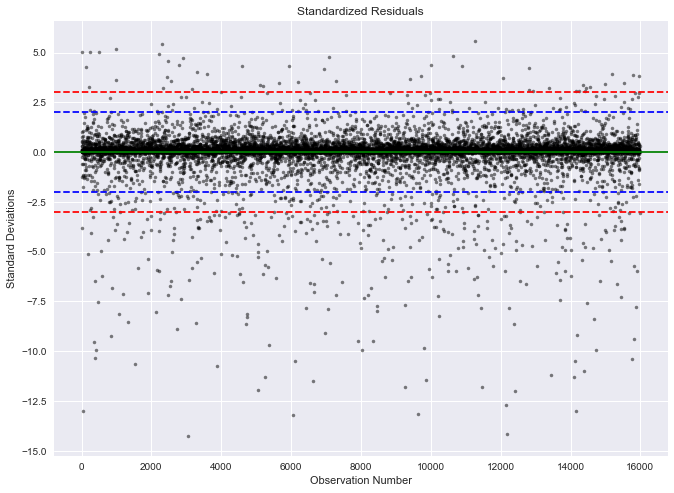

Anderson-Darling: 2818.8460156525725 Critical Value: 0.787 


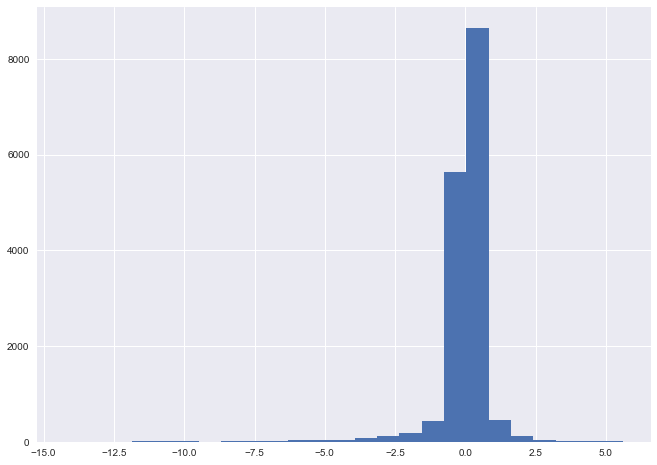

In [161]:

testing['resid'] = testing['pred']-testing['true']
testing['stdresid'] = testing['resid']/np.std(testing['resid'])

plt.plot(testing['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

stat, cv, sig = stats.anderson(testing['stdresid'], 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))

plt.hist(testing['stdresid'], bins=25)
plt.show()


In [108]:
train_y.shape, val_y.shape, test_y.shape

((31954,), (31954,), (15978,))

In [52]:
testing['decile'] = pd.qcut(testing['pred'], 10, labels=False)
testing.to_csv('predictiontesting.csv')                        